# Final Project4 - Modelling Performance - Predicting Airline Delay

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

from scipy import stats
import seaborn as sns

#This will render the plots inline
%matplotlib inline

In [3]:
#Import the Airline Delay data in csv format
fltdata = pd.read_csv('/Users/Prakash/GA/PROJECTS/airlinedelaycauses-DelayedFlights.csv')

In [4]:
#Check the Size of the data (How many Rows and Columns)
fltdata.shape

(1936758, 30)

In [5]:
# Display the header to show how the dataset looks like
fltdata.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### Performing Data Clean up
This is one of the important aspect of any analysis. Since this datset contains enough data so the starategy used here is to remive any row which has a blank/null value for any of the column

In [6]:
# DATA CLEANUP -  Performing data cleanup - START
# First Step - How many data points are null
fltdata.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
# DATA CLEANUP - Drop the null values from the dataset - END CLEAN UP
fltdata.dropna(how='any',inplace=True)

#Print the size of the dataset post cleanup
fltdata.shape

(1247486, 30)

### Columns which are decided to be considered for building the Model are
1. Month
2. DayofMonth
3. DayOfWeek
4. UniqueCarrier
5. Origin
6. Dest
7. DepTime
8. ArrTime

### Let's take a closer look at what types of data each of these columns contain

In [8]:
print "Total Options for Month : {}" .format(len(fltdata.Month.sort_values().unique()))
print "Unique Values for Month :{}".format(fltdata.Month.sort_values().unique())

Total Options for Month : 12
Unique Values for Month :[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [9]:
print "Total Options for DayofMonth : {}" .format(len(fltdata.DayofMonth.sort_values().unique()))
print "Unique Values for DayofMonth :{}".format(fltdata.DayofMonth.sort_values().unique())

Total Options for DayofMonth : 31
Unique Values for DayofMonth :[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31]


In [10]:
print "Total Options for DayOfWeek : {}" .format(len(fltdata.DayOfWeek.sort_values().unique()))
print "Unique Values for DayOfWeek :{}".format(fltdata.DayOfWeek.sort_values().unique())

Total Options for DayOfWeek : 7
Unique Values for DayOfWeek :[1 2 3 4 5 6 7]


In [11]:
print "Total Options for UniqueCarrier : {}" .format(len(fltdata.UniqueCarrier.sort_values().unique()))
print "Unique Values for UniqueCarrier :{}".format(fltdata.UniqueCarrier.sort_values().unique())

Total Options for UniqueCarrier : 20
Unique Values for UniqueCarrier :['9E' 'AA' 'AQ' 'AS' 'B6' 'CO' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW' 'OH' 'OO'
 'UA' 'US' 'WN' 'XE' 'YV']


In [12]:
print "Total Options for Origin : {}" .format(len(fltdata.Origin.sort_values().unique()))
print "Unique Values for Origin :{}".format(fltdata.Origin.sort_values().unique())

Total Options for Origin : 302
Unique Values for Origin :['ABE' 'ABI' 'ABQ' 'ABY' 'ACK' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX' 'AGS'
 'AKN' 'ALB' 'ALO' 'AMA' 'ANC' 'ASE' 'ATL' 'ATW' 'AUS' 'AVL' 'AVP' 'AZO'
 'BDL' 'BET' 'BFL' 'BGM' 'BGR' 'BHM' 'BIL' 'BIS' 'BJI' 'BLI' 'BMI' 'BNA'
 'BOI' 'BOS' 'BPT' 'BQK' 'BQN' 'BRO' 'BRW' 'BTM' 'BTR' 'BTV' 'BUF' 'BUR'
 'BWI' 'BZN' 'CAE' 'CAK' 'CDC' 'CDV' 'CEC' 'CHA' 'CHO' 'CHS' 'CIC' 'CID'
 'CLD' 'CLE' 'CLL' 'CLT' 'CMH' 'CMI' 'CMX' 'COD' 'COS' 'CPR' 'CRP' 'CRW'
 'CSG' 'CVG' 'CWA' 'DAB' 'DAL' 'DAY' 'DBQ' 'DCA' 'DEN' 'DFW' 'DHN' 'DLG'
 'DLH' 'DRO' 'DSM' 'DTW' 'EGE' 'EKO' 'ELM' 'ELP' 'ERI' 'EUG' 'EVV' 'EWN'
 'EWR' 'EYW' 'FAI' 'FAR' 'FAT' 'FAY' 'FCA' 'FLG' 'FLL' 'FLO' 'FNT' 'FSD'
 'FSM' 'FWA' 'GCC' 'GEG' 'GFK' 'GGG' 'GJT' 'GNV' 'GPT' 'GRB' 'GRK' 'GRR'
 'GSO' 'GSP' 'GST' 'GTF' 'GTR' 'GUC' 'HDN' 'HHH' 'HLN' 'HNL' 'HOU' 'HPN'
 'HRL' 'HSV' 'HTS' 'IAD' 'IAH' 'ICT' 'IDA' 'ILM' 'IND' 'INL' 'IPL' 'ISP'
 'ITH' 'ITO' 'IYK' 'JAC' 'JAN' 'JAX' 'JFK' 'JNU' 'KOA' 'KTN' 'LAN' 

In [13]:
print "Total Options for Dest : {}" .format(len(fltdata.Dest.sort_values().unique()))
print "Unique Values for Dest :{}".format(fltdata.Dest.sort_values().unique())

Total Options for Dest : 301
Unique Values for Dest :['ABE' 'ABI' 'ABQ' 'ABY' 'ACK' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX' 'AGS'
 'AKN' 'ALB' 'ALO' 'AMA' 'ANC' 'ASE' 'ATL' 'ATW' 'AUS' 'AVL' 'AVP' 'AZO'
 'BDL' 'BET' 'BFL' 'BGM' 'BGR' 'BHM' 'BIL' 'BIS' 'BJI' 'BLI' 'BMI' 'BNA'
 'BOI' 'BOS' 'BPT' 'BQK' 'BQN' 'BRO' 'BRW' 'BTM' 'BTR' 'BTV' 'BUF' 'BUR'
 'BWI' 'BZN' 'CAE' 'CAK' 'CDC' 'CDV' 'CEC' 'CHA' 'CHO' 'CHS' 'CIC' 'CID'
 'CLD' 'CLE' 'CLL' 'CLT' 'CMH' 'CMI' 'CMX' 'COD' 'COS' 'CPR' 'CRP' 'CRW'
 'CSG' 'CVG' 'CWA' 'DAB' 'DAL' 'DAY' 'DBQ' 'DCA' 'DEN' 'DFW' 'DHN' 'DLG'
 'DLH' 'DRO' 'DSM' 'DTW' 'EGE' 'EKO' 'ELM' 'ELP' 'ERI' 'EUG' 'EVV' 'EWN'
 'EWR' 'EYW' 'FAI' 'FAR' 'FAT' 'FAY' 'FCA' 'FLG' 'FLL' 'FLO' 'FNT' 'FSD'
 'FSM' 'FWA' 'GCC' 'GEG' 'GFK' 'GGG' 'GJT' 'GNV' 'GPT' 'GRB' 'GRK' 'GRR'
 'GSO' 'GSP' 'GST' 'GTF' 'GTR' 'GUC' 'HDN' 'HHH' 'HLN' 'HNL' 'HOU' 'HPN'
 'HRL' 'HSV' 'HTS' 'IAD' 'IAH' 'ICT' 'IDA' 'ILM' 'IND' 'INL' 'IPL' 'ISP'
 'ITH' 'ITO' 'IYK' 'JAC' 'JAN' 'JAX' 'JFK' 'JNU' 'KOA' 'KTN' 'LAN' 'LAS

In [14]:
print "Total Options for DepTime : {}".format(len(fltdata.DepTime.sort_values().unique()))
print "Size of the Original Data : {}".format(fltdata.shape)

Total Options for DepTime : 1435
Size of the Original Data : (1247486, 30)


In [15]:
print "Total Options for ArrTime : {}".format(len(fltdata.ArrTime.sort_values().unique()))
print "Size of the Original Data : {}".format(fltdata.shape)

Total Options for ArrTime : 1440
Size of the Original Data : (1247486, 30)


### Let's summarize what type of data each of these column contains

| **Feature Name**   |**Feature Type**   |**Number of Options**   |
| :------------ |:------------ | :------------|
| Month   |Categorical   |12 (1-12)   |
| DayOfMonth   |Categorical   |31 (1-31)   |
| DayofWeek   |Categorical   |7 (1-7)   |
| UniqueCarrier   |Categorical   |20 (1-20)   |
| Origin   |Categorical   |302   |
| Dest   |Categorical   |301 (1-12)   |
| DepTime   |Continuous   |1435   |
| ArrTime   |Continuous   |1440  |

**Now that we know what type of data and range of data each of these variable contains let's analyze how we should build this model.**
* As **DepTime** and **ArrTime** are **continuous** variables so we could train the model with these data without any issues.
* When it comes to Categorical variables from a model building perspective we need to create **(n-1)** disctinct dummy variables for each of the categorical variables with **n** different options.
* Considering the aspect of creating dummy variables the more the number of options the more number of dummy vairbales would be created and as such the model complexity increases. so let's analyze which among the above variables could be viable options.
* **Month** has **12** options so its feasible 
* **DayofWeek** has **7** options so its feasible
* **Carrier** is an important feature so we could create **20** dummy variables for carrier variable
* **DayOfMonth** has **31** different options so it would need to create **30** distinct Dummy variables. Since we have already considered **Month** as a variable for training this model so we could avoid this variable.
* **Origin** and **Dest** are the importat factor to predict Airline Delay so we need to have these values be used to train the model. However the challenging part if creating dummy variables for each of these unique values as there are **300+** disctinct Airports in this dataset.


** So now the Question is - What do we do with Origin and Dest variables ?**

* To make it simplified for the purpose of this Project let's further clean up the original dataset to include Top 10 busy Airports so that it would cover most of the Carrier operating our of these Airports. This is also keeping in view that we are building a **Linear Regression Model** to predict the Airline Delay.
* Considering the fact that we are building a model to predict an Airline Delay we could consider including only top **Destination Airports** and **exclude** the **Origin Airports** from our original consideration of been a candidate for training the mode.

In [16]:
#Display the top 10 busy Destination Airports
fltdata.Dest.value_counts()[:10]

ORD    79626
ATL    71607
DFW    45964
EWR    40873
DEN    38613
LAX    36402
SFO    33073
LAS    29647
LGA    28345
PHX    27337
Name: Dest, dtype: int64

In [17]:
topbusyairports = fltdata[(fltdata.Dest == 'ORD') | (fltdata.Dest == 'ATL') | (fltdata.Dest == 'DFW') | 
                          (fltdata.Dest == 'EWR') | (fltdata.Dest == 'DEN') | (fltdata.Dest == 'LAX') | 
                          (fltdata.Dest == 'SFO') | (fltdata.Dest == 'LAS') | (fltdata.Dest == 'LGA') | 
                          (fltdata.Dest == 'PHX')]

print "Size of original dataset : {}".format(fltdata.shape)
print "Size of filtered dataset : {}".format(topbusyairports.shape)

Size of original dataset : (1247486, 30)
Size of filtered dataset : (431487, 30)


In [18]:
#Let's now make sure if the filtered dataset contains same set of values for each of the variables

print "Total Options for Month : {}" .format(len(topbusyairports.Month.sort_values().unique()))
print "Unique Values for Month : {}".format(topbusyairports.Month.sort_values().unique())

print "Total Options for DayOfWeek : {}" .format(len(topbusyairports.DayOfWeek.sort_values().unique()))
print "Unique Values for DayOfWeek : {}".format(topbusyairports.DayOfWeek.sort_values().unique())

print "Total Options for UniqueCarrier : {}" .format(len(topbusyairports.UniqueCarrier.sort_values().unique()))
print "Unique Values for UniqueCarrier : {}".format(topbusyairports.UniqueCarrier.sort_values().unique())

print "Total Options for Dest : {}" .format(len(topbusyairports.Dest.sort_values().unique()))
print "Unique Values for Dest : {}".format(topbusyairports.Dest.sort_values().unique())

Total Options for Month : 12
Unique Values for Month : [ 1  2  3  4  5  6  7  8  9 10 11 12]
Total Options for DayOfWeek : 7
Unique Values for DayOfWeek : [1 2 3 4 5 6 7]
Total Options for UniqueCarrier : 20
Unique Values for UniqueCarrier : ['9E' 'AA' 'AQ' 'AS' 'B6' 'CO' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW' 'OH' 'OO'
 'UA' 'US' 'WN' 'XE' 'YV']
Total Options for Dest : 10
Unique Values for Dest : ['ATL' 'DEN' 'DFW' 'EWR' 'LAS' 'LAX' 'LGA' 'ORD' 'PHX' 'SFO']


### Let's now sumaarize what are the factors we are considering for building our model

1. Month
2. DayOfWeek
3. UniqueCarrier
4. Dest
5. DepTime
6. ArrTime

**Let's start creating the dummy variables for all Categorical variables and build the final dataset to be considered for model building**

In [19]:
#Create Dummy variables for Month
month_dummies = pd.get_dummies(topbusyairports.Month, prefix='month')
month_dummies.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Create Dummy variables for Day of Week
dayofweek_dummies = pd.get_dummies(topbusyairports.DayOfWeek, prefix='dow')
dayofweek_dummies.head()

,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
79,0.0,0.0,0.0,1.0,0.0,0.0,0.0
80,0.0,0.0,0.0,1.0,0.0,0.0,0.0
81,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
#Create Dummy variables for Unique Carrier
carrier_dummies = pd.get_dummies(topbusyairports.UniqueCarrier, prefix='carrier')
carrier_dummies.head()

,carrier_9E,carrier_AA,carrier_AQ,carrier_AS,carrier_B6,carrier_CO,carrier_DL,carrier_EV,carrier_F9,carrier_FL,carrier_HA,carrier_MQ,carrier_NW,carrier_OH,carrier_OO,carrier_UA,carrier_US,carrier_WN,carrier_XE,carrier_YV
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
#Create Dummy variables for Destination Airports
destairport_dummies = pd.get_dummies(topbusyairports.Dest, prefix='airport')
destairport_dummies.head()

,airport_ATL,airport_DEN,airport_DFW,airport_EWR,airport_LAS,airport_LAX,airport_LGA,airport_ORD,airport_PHX,airport_SFO
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Let's now drop one column from each dummy datset as we need (n-1) dummy variables for a categorical variable with n number of options


In [23]:
#Drop the first Column from Month Dummies
month_dummies.drop(month_dummies.columns[0], axis=1, inplace=True)
#month_dummies.head()

#Drop the first Column from Day of Week Dummies
dayofweek_dummies.drop(dayofweek_dummies.columns[0], axis=1, inplace=True)
#dayofweek_dummies.head()

#Drop the first Column from Unique Carrier Dummies
carrier_dummies.drop(carrier_dummies.columns[0], axis=1, inplace=True)
#carrier_dummies.head()

#Drop the first Column from Dest Dummies
destairport_dummies.drop(destairport_dummies.columns[0], axis=1, inplace=True)
#destairport_dummies.head()

In [24]:
#Concatenate the dummy dataset with original dataset

#Create a new dataset arrdelaydata which contains only the required columns from original dataset for model building

#Concatenate the Months dummy variables to arrdelaydata dataset (11)
cols_to_keep = ['ArrDelay','DepTime', 'ArrTime']
arrdelaydata = topbusyairports[cols_to_keep].join(month_dummies.ix[:, 'month_2':])


#Concatenate the Day of Week dummy variables to arrdelaydata dataset (6)
arrdelaydata = pd.concat([arrdelaydata, dayofweek_dummies], axis=1)

#Concatenate the Unique Carrier dummy variables to arrdelaydata dataset (19)
arrdelaydata = pd.concat([arrdelaydata, carrier_dummies], axis=1)

#Concatenate the Dest dummy variables to arrdelaydata dataset (9)
arrdelaydata = pd.concat([arrdelaydata, destairport_dummies], axis=1)
arrdelaydata.head()

,ArrDelay,DepTime,ArrTime,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,carrier_YV,airport_DEN,airport_DFW,airport_EWR,airport_LAS,airport_LAX,airport_LGA,airport_ORD,airport_PHX,airport_SFO
5,57.0,1937.0,2037.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,15.0,1452.0,1640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79,63.0,2232.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,112.0,1512.0,1802.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,16.0,2025.0,2301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Verify the total number of columns in the new dataset
print "Total number of columns in the arrdelaydata datset is : {}".format(len(arrdelaydata.columns.unique()))

Total number of columns in the arrdelaydata datset is : 48


In [26]:
#lm = smf.ols(formula='ArrDelay ~ C(Month, DayOfWeek, UniqueCarrier) + DepTime + ArrTime', data=topbusyairports).fit()

lm = smf.ols(formula='ArrDelay ~ DepTime + ArrTime + Month + DayOfWeek + UniqueCarrier', data=topbusyairports).fit()

In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     835.9
Date:                Mon, 23 Jan 2017   Prob (F-statistic):               0.00
Time:                        18:29:28   Log-Likelihood:            -2.4054e+06
No. Observations:              431487   AIC:                         4.811e+06
Df Residuals:                  431463   BIC:                         4.811e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              46.8155      1.446     32.378      0.000        43.982    49.649
UniqueCarrier[T.AA]    -2.1200      1.392     -1.523      0.128        -4.848     0.608
UniqueCarrier[T.AQ]   -30.5587     19.288     -1.584      0.113       -68.363     7.245
UniqueCarrier[T.AS]   -11.5063      1.693     -6.795      0.000       -14.825    -8.187
UniqueCarrier[T.B6]    10.6909      1.674      6.385      0.000         7.409    13.973
UniqueCarrier[T.CO]     0.1699      1.427      0.119      0.905        -2.628     2.968
UniqueCarrier[T.DL]    -4.8806      1.413     -3.454      0.001        -7.650    -2.111
UniqueCarrier[T.EV]     4.2740      1.427      2.996      0.003         1.478     7.070
UniqueCarrier[T.F9]   -22.2531      1.521    -14.629      0.000       -25.235   -19.272
UniqueCarrier[T.FL]    -3.1886      1.446     -2.205      0.027        -6.023    -0.354
UniqueCarrier[T.HA]    12.6783      3.386      3.745      0.000         6.042    19.314
UniqueCarrier[T.MQ]     3.4746      1.407      2.469      0.014         0.717     6.232
UniqueCarrier[T.NW]   -10.7818      1.510     -7.142      0.000       -13.741    -7.823
UniqueCarrier[T.OH]    -1.7975      1.580     -1.138      0.255        -4.894     1.299
UniqueCarrier[T.OO]     3.9002      1.413      2.761      0.006         1.131     6.669
UniqueCarrier[T.UA]     1.3540      1.397      0.969      0.333        -1.385     4.093
UniqueCarrier[T.US]    -7.7017      1.444     -5.333      0.000       -10.532    -4.871
UniqueCarrier[T.WN]   -20.5721      1.406    -14.629      0.000       -23.328   -17.816
UniqueCarrier[T.XE]    14.0329      1.451      9.674      0.000        11.190    16.876
UniqueCarrier[T.YV]     9.7194      1.471      6.606      0.000         6.836    12.603
DepTime                 0.0278      0.000    109.008      0.000         0.027     0.028
ArrTime                -0.0125      0.000    -60.633      0.000        -0.013    -0.012
Month                   0.0623      0.028      2.237      0.025         0.008     0.117
DayOfWeek               0.3621      0.049      7.448      0.000         0.267     0.457
==============================================================================
Omnibus:                   379313.470   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24309573.374
Skew:                           3.964   Prob(JB):                         0.00
Kurtosis:                      38.907   Cond. No.                     4.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+05. This might indicate that there are
strong multicollinearity or other numerical proble

In [28]:
#Build the Linear Regression Model
feature_cols = ['DepTime','ArrTime','month_2','month_3','month_4','month_5','month_6','month_7','month_8',
               'month_9','month_10','month_11','dow_2','dow_3','dow_4','dow_5','dow_6','dow_7',
               'carrier_AA','carrier_AQ','carrier_AS','carrier_B6','carrier_CO','carrier_DL',
               'carrier_EV','carrier_F9','carrier_FL','carrier_HA','carrier_MQ','carrier_NW','carrier_OH',
               'carrier_OO','carrier_UA','carrier_US','carrier_WN','carrier_XE','carrier_YV',
               'airport_DEN','airport_DFW','airport_EWR','airport_LAS','airport_LAX','airport_LGA',
               'airport_ORD','airport_PHX','airport_SFO']

X = arrdelaydata[feature_cols]
y = arrdelaydata.ArrDelay
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print linreg.intercept_
print linreg.coef_

55.281578772
[  2.78938113e-02  -1.28072629e-02  -3.45764771e+00  -5.64091083e+00
  -1.01669217e+01  -9.72124735e+00  -5.45688635e+00  -1.65764288e+00
  -4.86551130e+00  -1.16887872e+01  -1.38953195e+01  -6.38380136e+00
   1.79290140e+00  -3.56218719e+00  -1.28581765e+00   2.54006411e+00
  -5.72719925e-01   4.06653575e+00  -1.25624210e+00  -2.75475091e+01
  -6.21407720e+00   8.52773462e+00  -2.53876502e+00  -5.01003759e+00
   1.87158512e+00  -1.36487805e+01  -4.03106590e+00   2.63481869e+01
  -7.18852717e-02  -1.01848813e+01  -3.91064821e+00   5.23837070e+00
   2.58477000e+00  -1.93225402e+00  -1.09556211e+01   8.73887093e+00
   8.78483575e+00  -1.20310482e+01  -6.06753486e+00   6.12919242e+00
  -1.16444734e+01  -1.35823451e+01  -3.19972031e-01   7.60030924e+00
  -1.32029082e+01  -2.86435132e+00]


In [29]:
print zip(feature_cols,linreg.coef_)

[('DepTime', 0.027893811286336601), ('ArrTime', -0.012807262904376384), ('month_2', -3.4576477122644), ('month_3', -5.6409108324693626), ('month_4', -10.166921677972496), ('month_5', -9.7212473545520517), ('month_6', -5.4568863533621492), ('month_7', -1.657642881195674), ('month_8', -4.8655112969718406), ('month_9', -11.688787198755405), ('month_10', -13.89531950863768), ('month_11', -6.3838013626371124), ('dow_2', 1.792901402136774), ('dow_3', -3.5621871889017869), ('dow_4', -1.285817646618145), ('dow_5', 2.5400641088373348), ('dow_6', -0.57271992522105197), ('dow_7', 4.0665357491143412), ('carrier_AA', -1.256242096085086), ('carrier_AQ', -27.547509075323738), ('carrier_AS', -6.2140771990101982), ('carrier_B6', 8.5277346187130991), ('carrier_CO', -2.5387650171669294), ('carrier_DL', -5.010037588901783), ('carrier_EV', 1.8715851205567118), ('carrier_F9', -13.648780519966353), ('carrier_FL', -4.031065895807064), ('carrier_HA', 26.348186947261272), ('carrier_MQ', -0.071885271715119714), 

In [30]:
y_pred = linreg.predict(X_train)
print y_pred
print y_train.values

[ 72.75478166  82.27809245  63.08889987 ...,  92.75245337  82.94851267
  89.2382475 ]
[ 59.  17.  78. ...,  63.  48.  30.]


In [31]:
metrics.r2_score(y_train.values,y_pred)

0.058219469495263021

### Analysis - Let's do some more analysis on the original dataset and analyze how the Arrival Delay is impacted by different factors

#### Let's Analyze how different type of Delay impacts Arrival Delay by ploting as a graph. The dataset has below types of delay
1. CarrierDelay
2. WeatherDelay
3. NASDelay
4. SecurityDelay
5. LateAircraftDelay


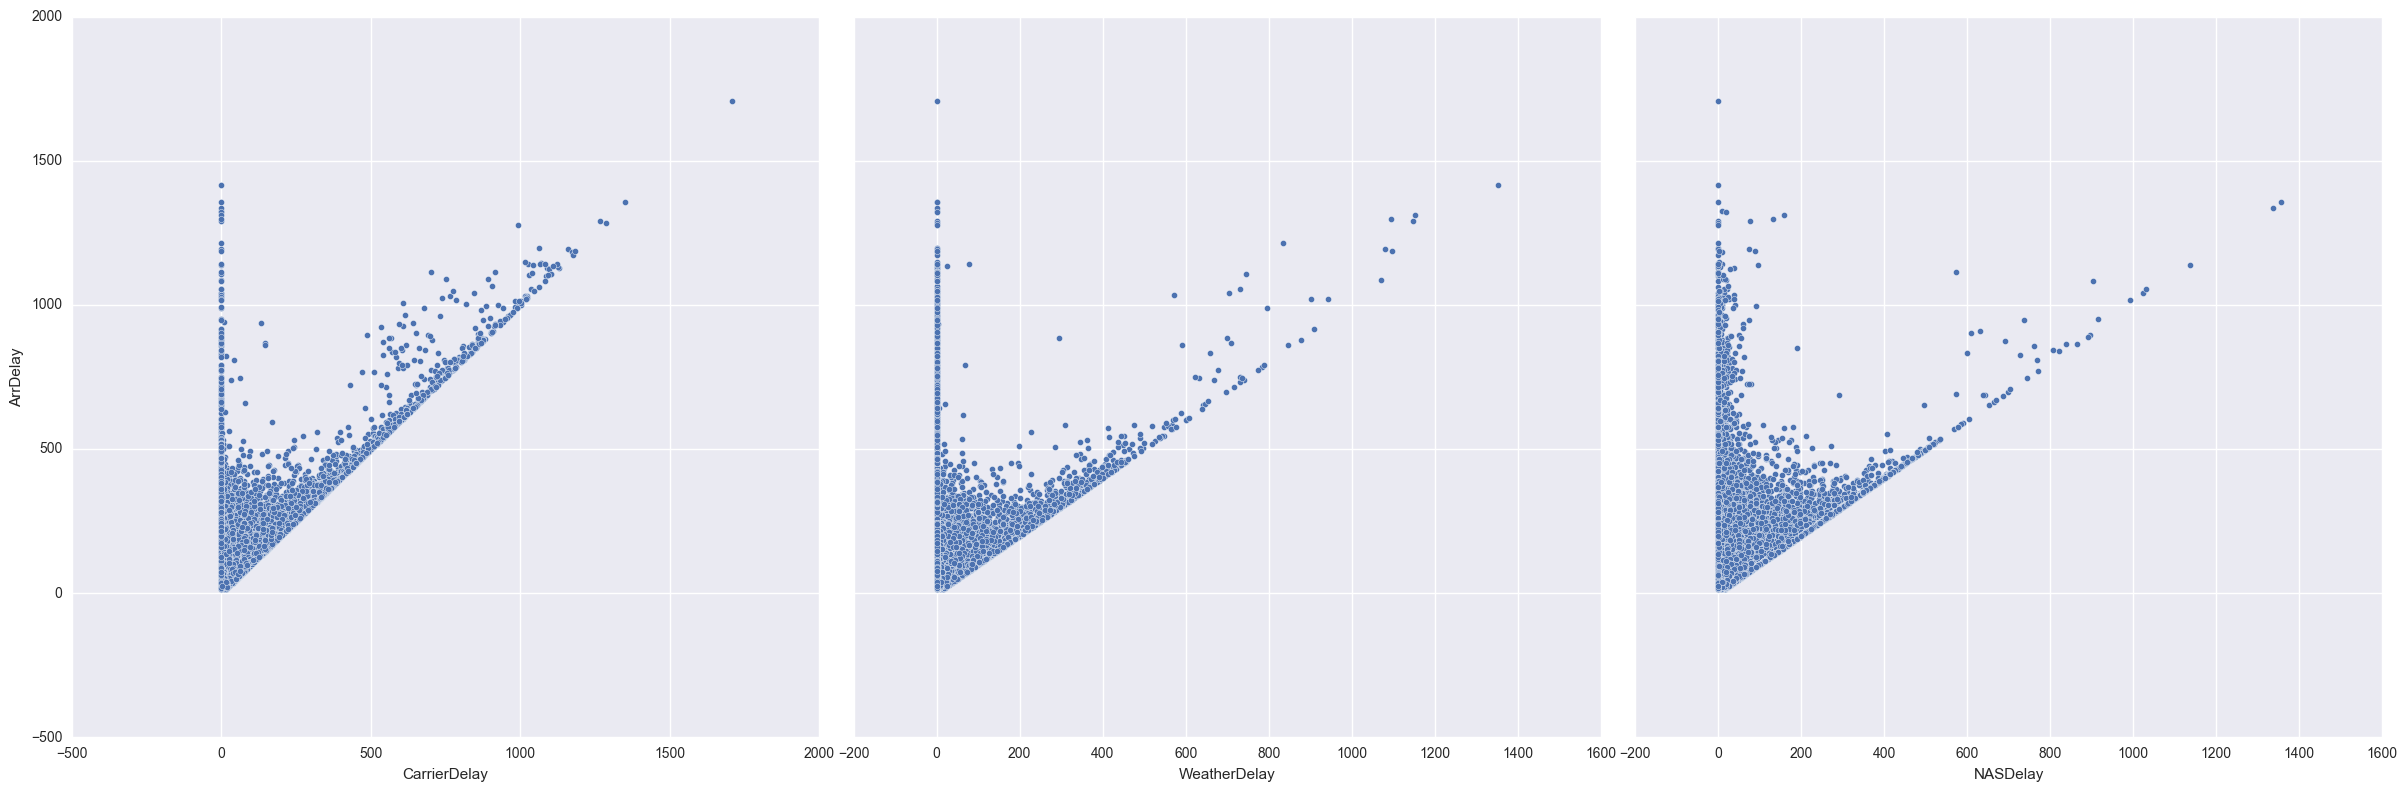

In [32]:
# Plot graphs to analyze relationship between each type of delay with the Arrival Delay
sns.pairplot(topbusyairports,x_vars=['CarrierDelay','WeatherDelay','NASDelay'],
             y_vars='ArrDelay',size=8)

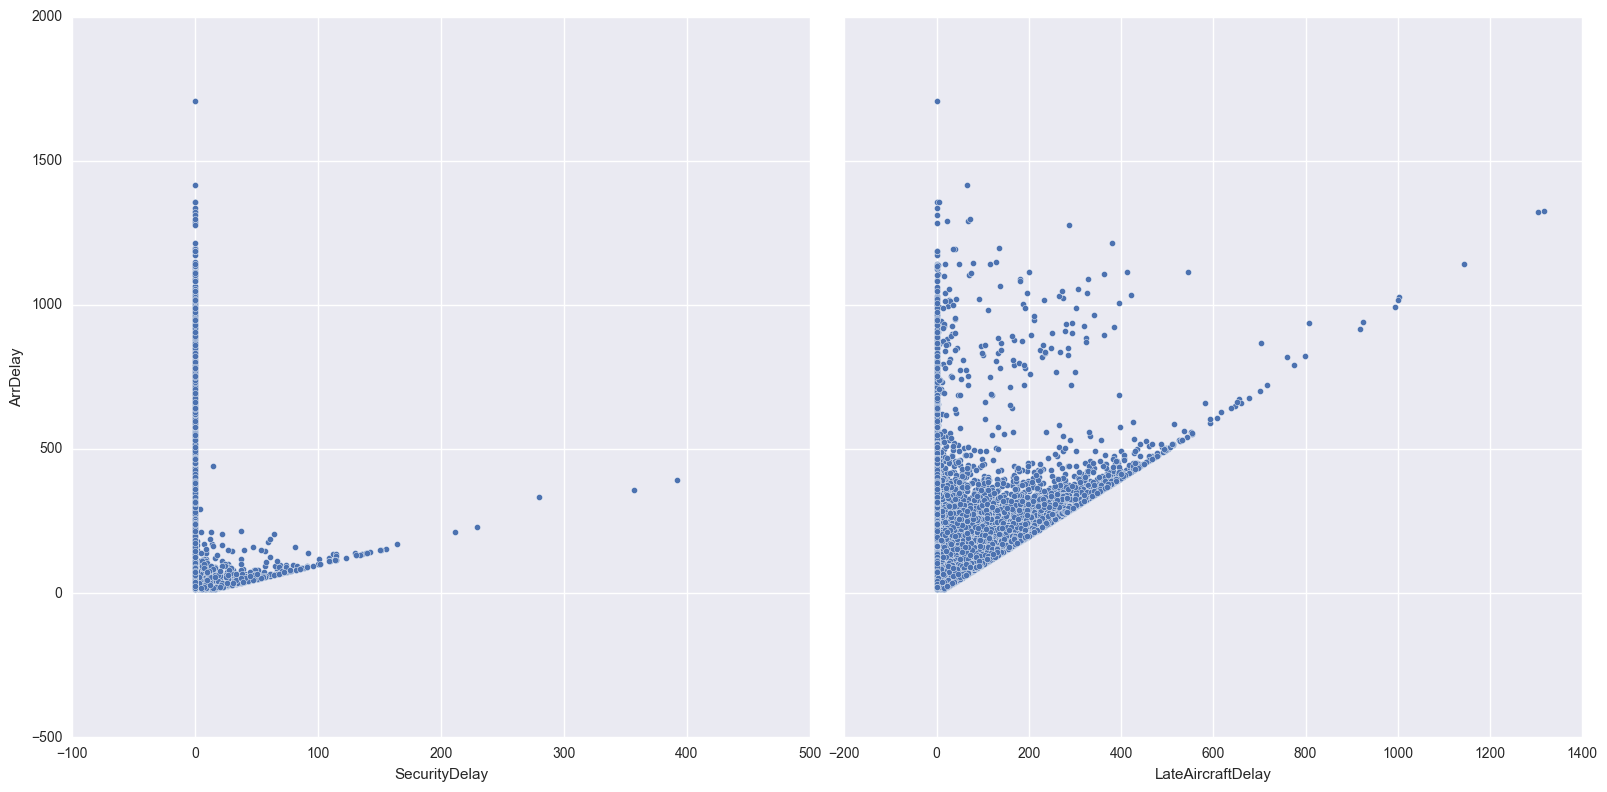

In [33]:
# Plot graphs to analyze relationship between each type of delay with the Arrival Delay
sns.pairplot(topbusyairports,x_vars=['SecurityDelay','LateAircraftDelay'],
             y_vars='ArrDelay',size = 8)

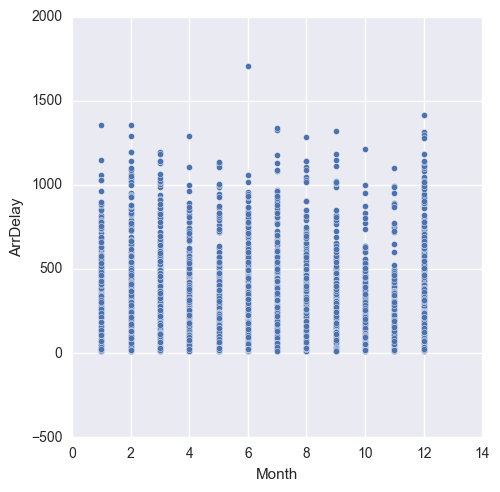

In [34]:
#Plot the Arrival Dealy to show which month has the maximum delay
sns.pairplot(topbusyairports, x_vars='Month', y_vars='ArrDelay', kind='scatter', size=5)

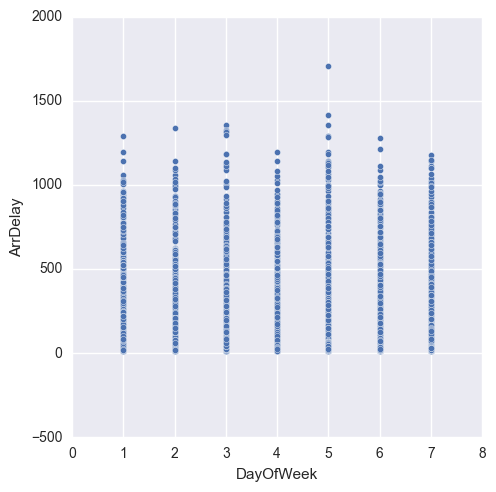

In [35]:
#Plot the Arrival Dealy to show which Day of week has the maximum delay
sns.pairplot(topbusyairports, x_vars='DayOfWeek', y_vars='ArrDelay', kind='scatter', size=5)

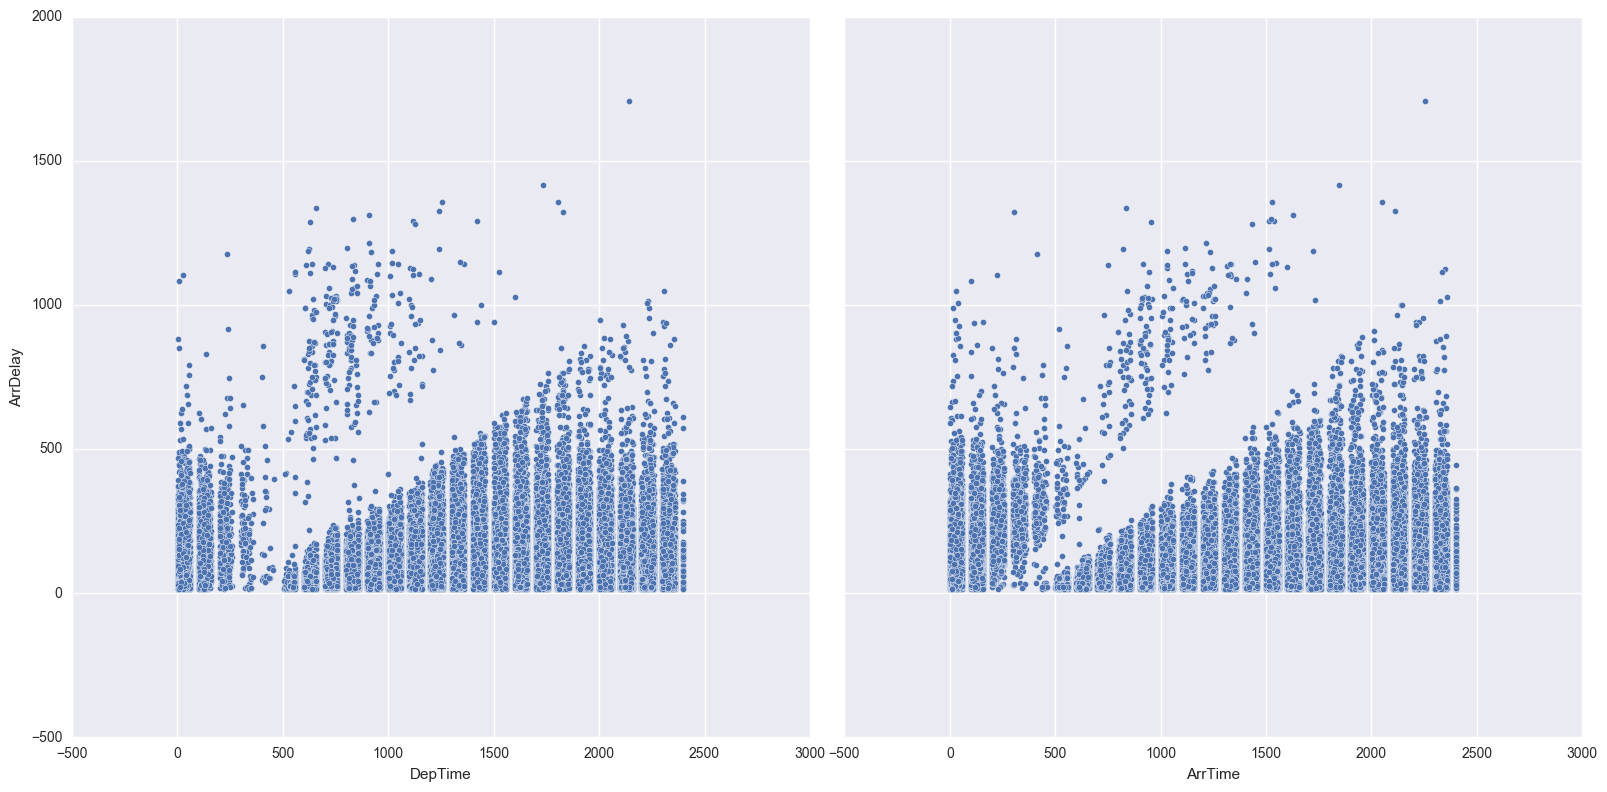

In [36]:
# Plot graphs to analyze relationship between each type of delay with the Arrival Delay
sns.pairplot(topbusyairports,x_vars=['DepTime','ArrTime'],
             y_vars='ArrDelay', size=8)

In [37]:
#Count the number of flights which had on time arrival
len(topbusyairports[topbusyairports['ArrDelay'] == 0])

0

In [38]:
#Count the number of flights which had late arrival
len(topbusyairports[topbusyairports['ArrDelay'] > 0])

431487

In [39]:
#Count the number of flights which were ahead of the arrival schedule
len(topbusyairports[topbusyairports['ArrDelay'] < 0])

0

In [40]:
#What was the maximum delay in minutes
topbusyairports['ArrDelay'].max()

1707.0

In [41]:
#Confirm that was the maximum delay
len(topbusyairports[topbusyairports['ArrDelay'] > 1707])

0

In [42]:
#Print the details of the Flight having maximum Delay

print topbusyairports.loc[topbusyairports['ArrDelay'].argmax()]

Unnamed: 0           3387883
Year                    2008
Month                      6
DayofMonth                20
DayOfWeek                  5
DepTime                 2140
CRSDepTime              1710
ArrTime                 2252
CRSArrTime              1825
UniqueCarrier             MQ
FlightNum               3538
TailNum               N512AE
ActualElapsedTime         72
CRSElapsedTime            75
AirTime                   50
ArrDelay                1707
DepDelay                1710
Origin                   LIT
Dest                     DFW
Distance                 304
TaxiIn                     6
TaxiOut                   16
Cancelled                  0
CancellationCode           N
Diverted                   0
CarrierDelay            1707
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
Name: 1009553, dtype: object


In [43]:
#What was the minimum delay time
topbusyairports['ArrDelay'].min()

15.0

In [44]:
#Confirm that was the earliest arrival time
len(topbusyairports[topbusyairports['ArrDelay'] < 15])

0

In [45]:
#Print the row with earliest arrival Flight
topbusyairports.loc[topbusyairports['ArrDelay'].argmin()]

Unnamed: 0               16
Year                   2008
Month                     1
DayofMonth                3
DayOfWeek                 4
DepTime                1452
CRSDepTime             1425
ArrTime                1640
CRSArrTime             1625
UniqueCarrier            WN
FlightNum               675
TailNum              N286WN
ActualElapsedTime       228
CRSElapsedTime          240
AirTime                 213
ArrDelay                 15
DepDelay                 27
Origin                  IND
Dest                    PHX
Distance               1489
TaxiIn                    7
TaxiOut                   8
Cancelled                 0
CancellationCode          N
Diverted                  0
CarrierDelay              3
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay        12
Name: 9, dtype: object

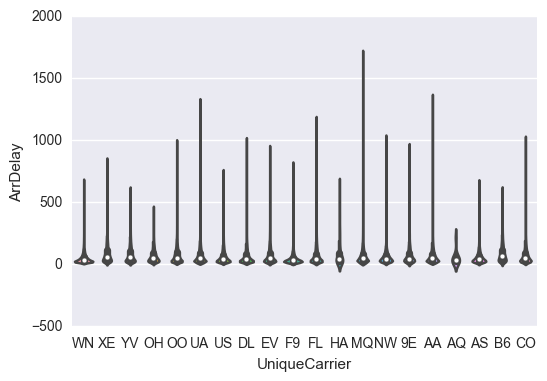

In [46]:
#Plot the delay for each carrier
sns.violinplot(x=topbusyairports.UniqueCarrier,y=topbusyairports.ArrDelay)

In [47]:
#Calculate the total number of Flights delayed by more than 5 minutes
#Create a new data field 'Delayed' that would store Boolean value of if flight is delayed or not delayed
topbusyairports['Delayed'] = topbusyairports['ArrDelay'].apply(lambda x:x>15)

#Print the distinct number of values for the Delayed field
topbusyairports['Delayed'].value_counts()

/Users/Prakash/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


True     421580
False      9907
Name: Delayed, dtype: int64

In [48]:
#Calculate the overall percentage of delayed flights
data_delayed = topbusyairports['Delayed'].value_counts()[1]
data_notdelayed = topbusyairports['Delayed'].value_counts()[0]
print data_delayed
print data_notdelayed

#percentage_delayed = float(data_delayed) / (data_delayed + data_notdelayed)
#print 'Total Percentage of Delayed flights is : {}%'.format(percentage_delayed*100)

421580
9907


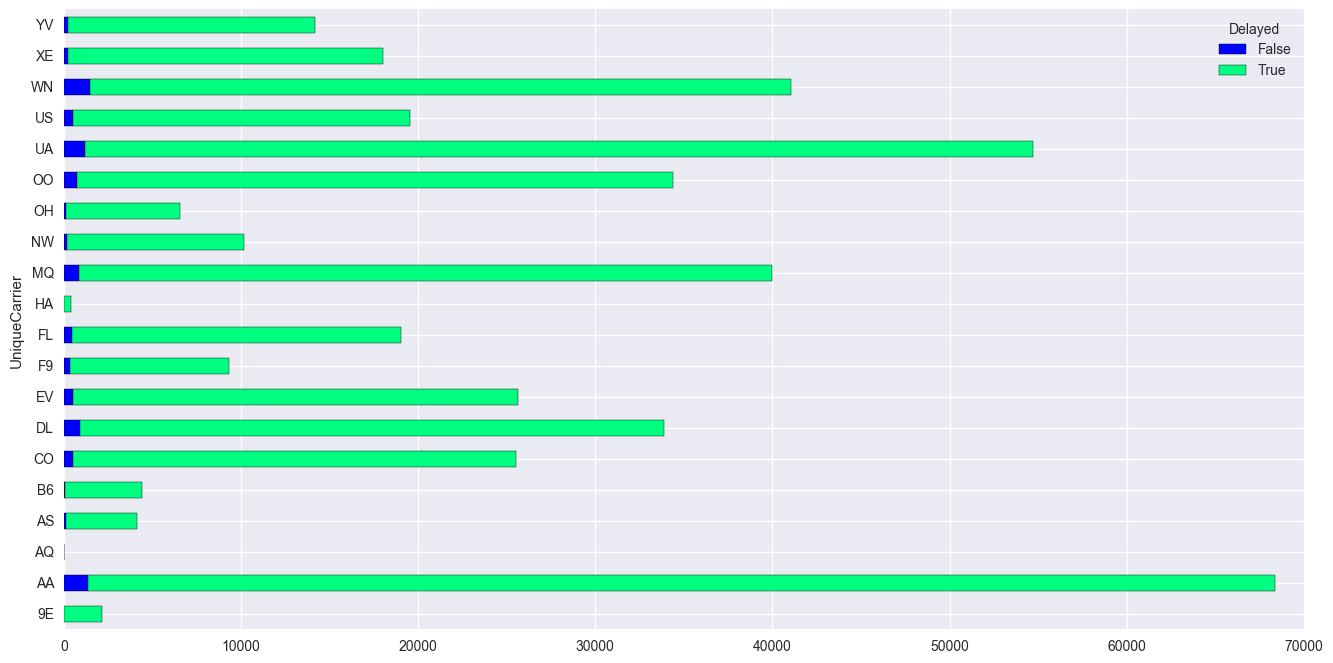

In [49]:
#Calculate the delayed/non delayed flights based on carrier
data_groupby_carrier = topbusyairports.groupby(['UniqueCarrier','Delayed'])
count_delayby_carrier = data_groupby_carrier.size().unstack()

#count_delayby_carrier
count_delayby_carrier.plot(kind='barh', stacked=True, figsize=[16,8], colormap='winter')


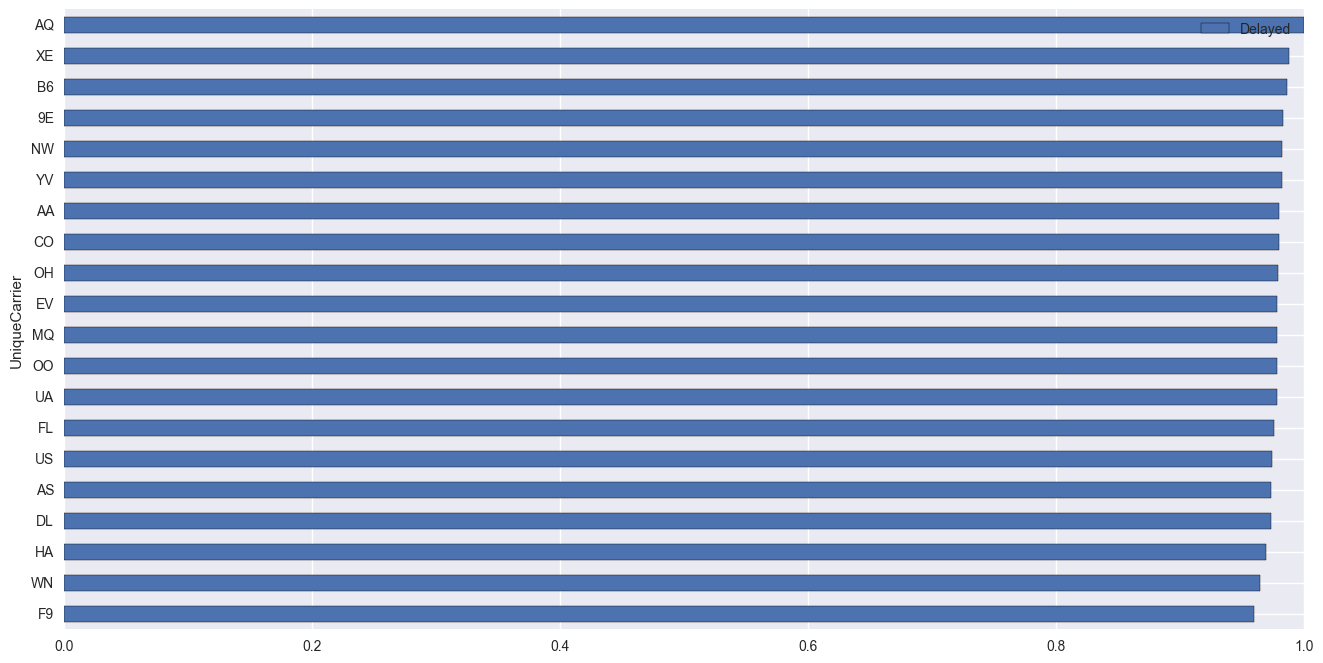

In [50]:
#Calculate the delayed/non delayed flights based on carrier
topbusyairports[['UniqueCarrier','Delayed']].groupby('UniqueCarrier').mean().sort_values('Delayed').plot(kind='barh', 
                                                                                              figsize=(16,8))

In [51]:
data_groupby_carrier.Delayed.count()

UniqueCarrier  Delayed
9E             False         37
               True        2133
AA             False       1370
               True       66998
AQ             True          11
AS             False        108
               True        3998
B6             False         60
               True        4358
CO             False        518
               True       25010
DL             False        898
               True       32975
EV             False        544
               True       25090
F9             False        373
               True        8957
FL             False        453
               True       18575
HA             False         13
               True         412
MQ             False        855
               True       39120
NW             False        178
               True        9977
OH             False        139
               True        6436
OO             False        746
               True       33667
UA             False       1202
               Tr

In [52]:
data.columns.values

NameError: name 'data' is not defined

In [ ]:
sns.pairplot(data,x_vars=['Month','DayofMonth','DayOfWeek','DepTime','ArrTime'],y_vars='ArrDelay',size=7,aspect=0.7,kind='reg')

In [ ]:
fltdata.shape

In [ ]:
#Data Cleaning (Use inplace = True to permanently drop the values)
#fltdata.dropna(how='any').shape
#fltdata.dropna(how='all').shape
fltdata.isnull().sum()

In [ ]:
fltdata.notnull().sum()

In [ ]:
fltdata.dropna(how='any',inplace='True')

In [ ]:
fltdata.shape

In [ ]:
len(fltdata.Origin.unique())

In [ ]:
fltdata.Origin.value_counts()